In [1024]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [1025]:
ccseg = pd.read_csv("Credit Card Customer Data.csv")  
ccseg.shape

(660, 7)

In [1026]:
ccseg.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [1027]:
ccseg.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


# #Attributes or feature meaning##
#SI_No: serial number: We can drop this from the data frame as it does not important information
####
#customer key: the bank key is a unique, country-dependent identifier: 
Based on this definition this variable is not important and can be dropped as well later
####
#Avg_Credit Limit: Your credit card's credit limit is the maximum outstanding balance you can have on your credit card at a given point in time without receiving a penalty.
####
#Total_credit card: How many crdit cards this customer has
####
#Total_visits bank: How many times the customer has visited the bank
#Total_visits online: How many times the customer has logeed in 
#Total_calls_made: How many times the customer has called the bank

# #Missing valuses and data type##

In [1028]:
ccseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#No values are missing and all variables are numericals

In [1029]:
ccseg.columns
for col in ccseg.columns:
    print(col,': number of unique entries = ',ccseg[col].nunique())

Sl_No : number of unique entries =  660
Customer Key : number of unique entries =  655
Avg_Credit_Limit : number of unique entries =  110
Total_Credit_Cards : number of unique entries =  10
Total_visits_bank : number of unique entries =  6
Total_visits_online : number of unique entries =  16
Total_calls_made : number of unique entries =  11


# # Do we have duplicated rows? ##

In [1030]:
#lets check if we have duplicate rows
duplicate = ccseg.duplicated(subset=None, keep='first')#first means print all duplicate rows except their first occurance time
print(len(duplicate))
duplicate_index=[]
for i in range(len(duplicate)):
    if duplicate[i]!=False:
        #print(i,'is the dupliacte index')
        #print(concrete.loc[[i]])
        duplicate_index.append(i)
        #print("")
    #else:
        #print('No duplicates')
print('duplicate row index',duplicate_index)  
print(len(duplicate_index))
print('the new number of the rows in crdit card customers data frame with out the duplicate rows =',len(duplicate)-len(duplicate_index))

660
duplicate row index []
0
the new number of the rows in crdit card customers data frame with out the duplicate rows = 660


#No duplicates

# # statistical moments of features # #

In [1031]:
Describe=ccseg.describe()
print(ccseg.columns)

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [1032]:
DescribeT=Describe.T
Intg_col =['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
DescribeT['median'] = ccseg[Intg_col].median()

In [1033]:
DescribeT

,count,mean,std,min,25%,50%,75%,max,median
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0,330.5
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0,53874.5
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0,18000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0,5.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0,2.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0,2.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0,3.0


#From the DescribeT data frame above we can see that all min and max values do make sense
#Also the Avg_Crdit_Limit's mean is 50% off relative to the mean which indicates skewness here
#All other features have relatively normal distributions (Total_credit cards, Total bank visits, Total online visits, Totall calls)

## Drop the unsessary coloumns##

In [1034]:
ccseg=ccseg.drop(['Sl_No', 'Customer Key'], axis=1)

In [1035]:
ccseg.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


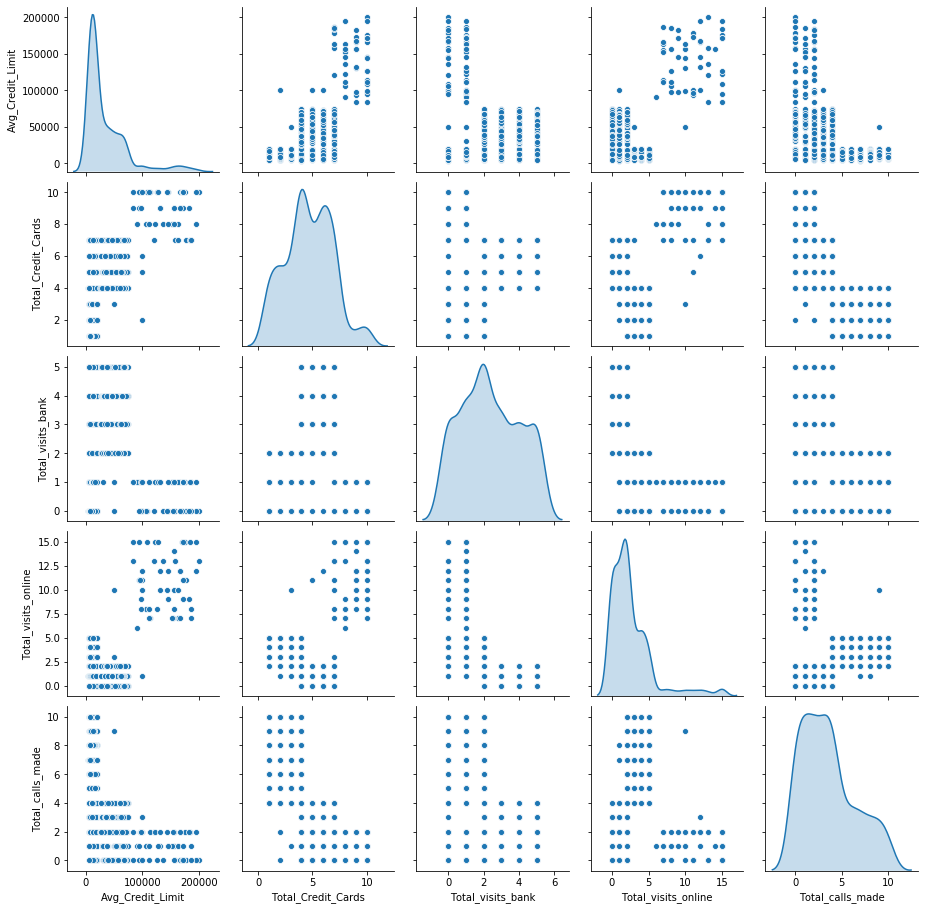

In [1036]:
sns.pairplot(ccseg,diag_kind = 'kde')

#lets try to read some information about the data:
#Firstly:
#lets try to prdeict how many clusters we can ancicipate based on the KDE plots in the diagonal above:
The kde of Avg crdit linit suggests 3 culsters. The total crdit cards suggests 4 clusters. The total visits to the bank siggests around 3 clusters also total visits online and toatl calls made both sugest around 3 clusters.
#I will look later at the joint KDE of every two variables to try to dicover if there are hidden peaks as well( see Bivariant density plots below)
#########
#Secondly:
#we look at the plots located in the lower triangle of the pair plots:
#By looking at the Avg credit limit vs Total crdit card, we can identify two groups: customers with high crdit limit have high number of crdit cards at least 7 crdit cards, while customers with relatively low crdit limit have less than 7 crdit cards
#By looking at the Avg crdit limit vs Total visits online, we can also identify two seggregations: customers with high credit limit make online visits very often while thoes with low crdit limit make very limited vists online.
#Another observation is that: If we look at the plot of Total crdit cards vs Total visits onlie: we again identify two clouds: customers with more than 5 crdit cards make more than 5 vists to online banking while customers with crdit cards less than 5 do (relatively) not make many visits.

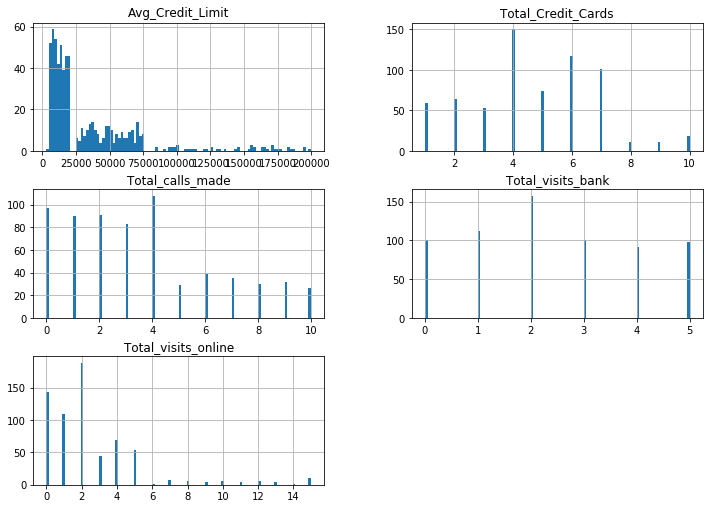

In [1037]:
col=ccseg.columns
ccseg[col].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2));

## Outliers overview ##

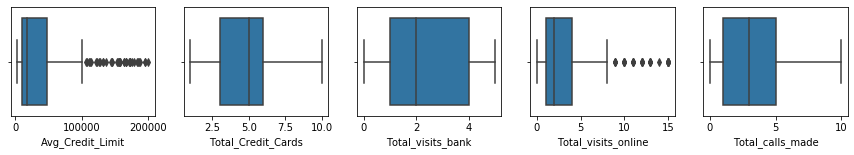

In [1038]:
plt.figure(figsize=(15,2))
plt.subplot(1, 5, 1)
sns.boxplot(ccseg["Avg_Credit_Limit"]) # 
plt.subplot(1, 5, 2)
sns.boxplot(ccseg["Total_Credit_Cards"])
plt.subplot(1, 5, 3)
sns.boxplot(ccseg["Total_visits_bank"])
plt.subplot(1, 5, 4)
sns.boxplot(ccseg["Total_visits_online"])
plt.subplot(1, 5, 5)
sns.boxplot(ccseg["Total_calls_made"])

#As shown above:We can see that the avergae credit limit and the total visits online both have outliers.
#However, these outliers are real numbers.
#I will not treat them here to see how data will behave

In [1039]:
##we can also look into joint histograms
#h =plt.hist2d(ccseg['Avg_Credit_Limit'], ccseg['Total_Credit_Cards'])
#plt.colorbar(h[3])

# # Bivariant density plots # #

#According to the lectures we have had in the course, visulizing two densities of the two variables with the highest number of peaks could help us predict in advance how many clusters we might have. This visulization with the color index can be considerd 3D visulaization. This can help us to discover some hidden peaks, which might be dificult to visualize in the 2D representation above
#Lets plot all of them first:

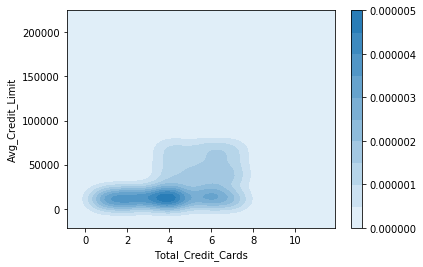

In [1040]:
sns.kdeplot( ccseg['Total_Credit_Cards'],ccseg['Avg_Credit_Limit'],cbar=True,shade=True)

#This plot above between crdit limit and total crdit cards suggest 3 clusters, three dark circles with different heights

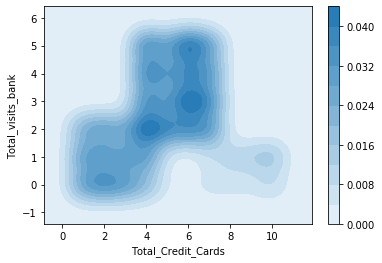

In [1041]:
sns.kdeplot(ccseg['Total_Credit_Cards'],ccseg['Total_visits_bank'],cbar=True,shade=True)

#The dark circles indicate a peak: looks like this plot above suggests 4 to 6 clusters of diffrent heights

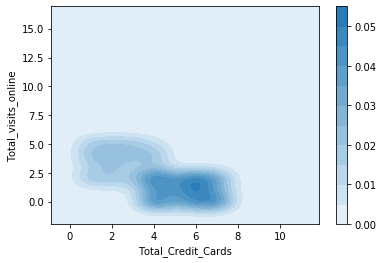

In [1042]:
sns.kdeplot(ccseg['Total_Credit_Cards'],ccseg['Total_visits_online'],cbar=True,shade=True)

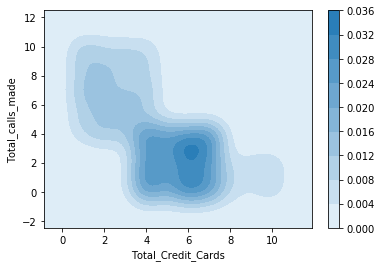

In [1043]:
sns.kdeplot(ccseg['Total_Credit_Cards'],ccseg['Total_calls_made'],cbar=True,shade=True)

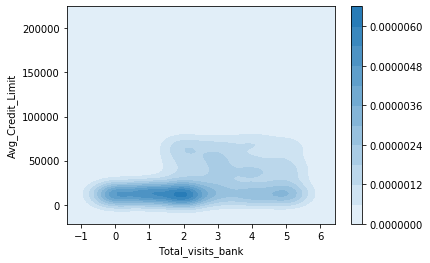

In [1044]:
sns.kdeplot( ccseg['Total_visits_bank'],ccseg['Avg_Credit_Limit'],cbar=True,shade=True)

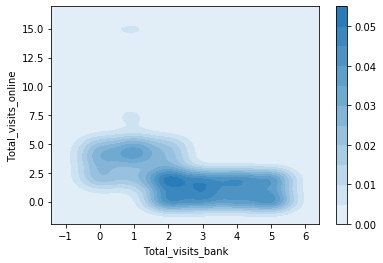

In [1045]:
sns.kdeplot( ccseg['Total_visits_bank'],ccseg['Total_visits_online'],cbar=True,shade=True)

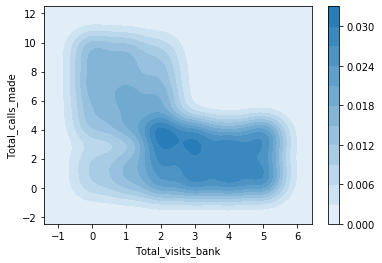

In [1046]:
sns.kdeplot( ccseg['Total_visits_bank'],ccseg['Total_calls_made'],cbar=True,shade=True)

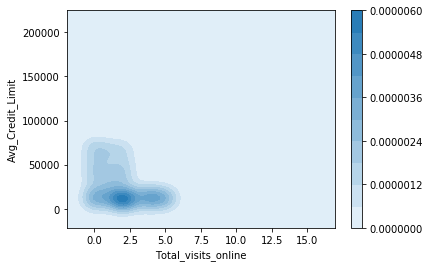

In [1047]:
sns.kdeplot( ccseg['Total_visits_online'],ccseg['Avg_Credit_Limit'],cbar=True,shade=True)

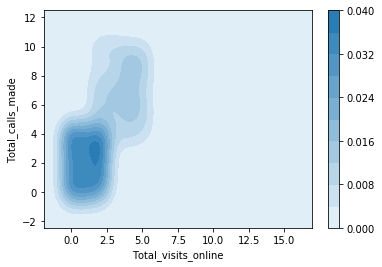

In [1048]:
sns.kdeplot( ccseg['Total_visits_online'],ccseg['Total_calls_made'],cbar=True,shade=True)

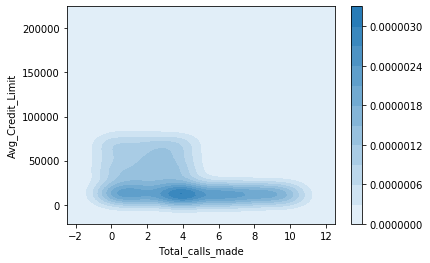

In [1049]:
sns.kdeplot( ccseg['Total_calls_made'],ccseg['Avg_Credit_Limit'],cbar=True,shade=True)

# # Corrolation overview ##

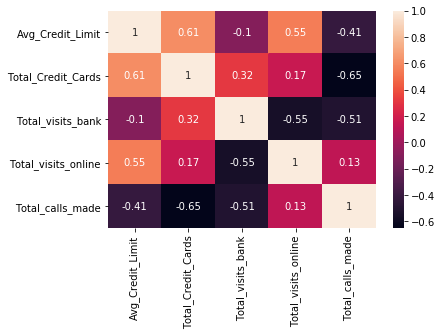

In [1050]:
corr = ccseg.corr()
sns.heatmap(corr, annot = True)

#Here we see that there is:
#a relatively high positive corrolation of (0.61) between Avg Credit limit and Total credit cards
#anther relatively high positive corrolation of(0.55) between Avg Crdit limit and Total visits online
#on the other hand:
#the negative corrolation between Total Credit cards and Total calls made is relatively high (-0.65)
#then comes the negative corolation between Total visits bank and Total visits online (-0.55)
#after that the negative corrlation between Total visits bank and Total calls made (-0.51)
#Now:
#If we consider the high corrolation threshold is 0.7, then we will end up keeping all these  6 variables and see how things go
#we might decrease the threshold in needed later..but how I will know..lets see

# # Data scaling # #

In [1051]:
#ccseg.head()

In [1052]:
from scipy.stats import zscore
ccsegScaled=ccseg.apply(zscore)
#sns.pairplot(ccsegScaled,diag_kind='kde')

#the scaled data frame is:

In [1053]:
ccsegScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


# # K means clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

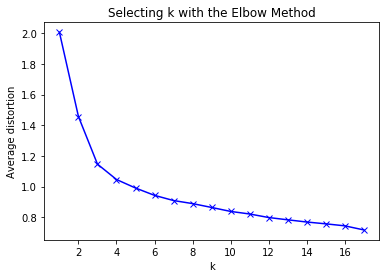

In [1054]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,18)
#print(clusters)
meanDistortions=[]

for k in clusters:
        #print(k)
        model=KMeans(n_clusters=k,n_init=20)
        model.fit(ccsegScaled)
        prediction=model.predict(ccsegScaled)
        meanDistortions.append(sum(np.min(cdist(ccsegScaled, model.cluster_centers_, 'euclidean'), axis=1)) / ccsegScaled
                           .shape[0])
        #print(meanDistortions)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#So here in the elbow figure above, we look at the sum of square errors or the Average distortion which is the mean sum of squared distances to centers as a function in clusters numbers k
#As the plot shows, the elbow point is at k=3, at this point the error is small and the computation cost is realtively small. #Because if we incresed k further, the error drops but it is not woth the complexity of the calculations.

# #k=3 model and its Silhouette coeff.

In [1055]:

from sklearn.metrics import silhouette_score
#Next lets try K= 2,3,4,5,6 and 16 just to see how the extreme behavie
K=3
K_3=KMeans(n_clusters=K,n_init=20)
#print(K_3)
K_3.fit(ccsegScaled)
#print(K_3.fit(ccsegScaled))
prediction_K3=K_3.predict(ccsegScaled)
#print(prediction_K3)
#print(len(prediction_K3))
#print(K_3.fit_predict(ccsegScaled)): important note this gives the same result
#as the results given by the previous two lines K3.fit then K3.predict
Silhouette_avg = silhouette_score(ccsegScaled, prediction_K3)
print('Silhouette_avg for k =',K ,'is',Silhouette_avg)

Silhouette_avg for k = 3 is 0.5157182558881063


# #Silhouette_score of a list of k means models
Here lets try a list of k to verfiy and then plot the score against k:

In [1056]:
K=[2,3,4,5,6,16]
Silhouette_score=[]
for k in K:
    model=KMeans(n_clusters=k,n_init=30)
    model.fit(ccsegScaled)
    prediction_k=model.predict(ccsegScaled)
    Silhouette_avg = silhouette_score(ccsegScaled, prediction_k)
    Silhouette_score.append(Silhouette_avg)
print(Silhouette_score) 

[0.41842496663215445, 0.5157182558881063, 0.3556670619372605, 0.2717470361089752, 0.25583657571102003, 0.22217363703376367]


In [1057]:
#lets collect the scores in a data frame called performance:
performance = pd.DataFrame()
performance ["number of clusters k"]= K
performance ["Silhouette_score_k means"]=Silhouette_score
performance

,number of clusters k,Silhouette_score_k means
0,2,0.418425
1,3,0.515718
2,4,0.355667
3,5,0.271747
4,6,0.255837
5,16,0.222174


<function matplotlib.pyplot.show(*args, **kw)>

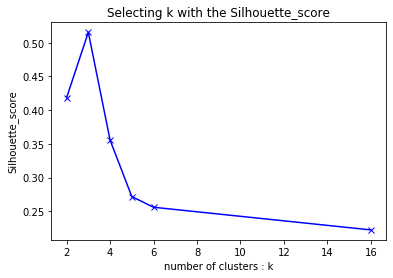

In [1058]:
plt.plot(K,Silhouette_score,'bx-')
plt.xlabel('number of clusters : k')
plt.ylabel('Silhouette_score')
plt.title('Selecting k with the Silhouette_score')
plt.show

#So this plot says that the best k is 3 clusters as it has the highest Silhoutte score
#Then comes k=2 that has the second highest Sihlhoutte score, then k=4.
#it is intresting to see that the Sihouette score is maximum at k=3, then as we increse the clusters it drops significantley
#then, no matter how much we increse the number of clusters to 5 or above, the Sihouette score becomes very low and almost constant value
#looks like this further enhance the wlbow grap result
#However: part of the choice process of the ultimate k is the domain experts knowledge
#but to get more insights into the variations of each variable between clusters lets look at the Boxplots
#now let visulaize the boxplots of the k=3 clusters:

# # Boxplots for k=3  model and the statistical moments of the groups interpretation: Kmeans

In [1059]:
##Append the prediction 
ccseg["GROUP"] = prediction_K3
ccseg['GROUP'] = ccseg['GROUP'].astype('category')
ccseg.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [1060]:
#lets look at the mean of each feature in each group:
ccsegClust = ccseg.groupby(['GROUP'],as_index=False)
ccsegClust.mean()

,GROUP,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [1061]:
#data.groupby('month')['duration'].sum()
#ccsegClust['Avg_Credit_Limit'].var()

In [1062]:
#here lets look at the statisctical moments in each feature in each group:
ccsegClust.describe().T

0             1              2
Avg_Credit_Limit    count     386.000000    224.000000      50.000000
                    mean    33782.383420  12174.107143  141040.000000
                    std     22169.460696   5249.048524   34457.877272
                    min      5000.000000   3000.000000   84000.000000
                    25%     13000.000000   8000.000000  108750.000000
                    50%     31000.000000  12000.000000  145500.000000
                    75%     52000.000000  16000.000000  170000.000000
                    max    100000.000000  50000.000000  200000.000000
Total_Credit_Cards  count     386.000000    224.000000      50.000000
                    mean        5.515544      2.410714       8.740000
                    std         1.140069      1.100783       1.274715
                    min         2.000000      1.000000       5.000000
                    25%         4.000000      1.000000       8.000000
                    50%         6.000000      2.000000       9.000000
                    75%         6.000000      3.000000      10.000000
                    max         7.000000      4.000000      10.000000
Total_visits_bank   count     386.000000    224.000000      50.000000
                    mean        3.489637      0.933036       0.600000
                    std         1.135563      0.803567       0.494872
                    min         1.000000      0.000000       0.000000
                    25%         3.000000      0.000000       0.000000
                    50%         3.000000      1.000000       1.000000
                    75%         5.000000      2.000000       1.000000
                    max         5.000000      2.000000       1.000000
Total_visits_online count     386.000000    224.000000      50.000000
                    mean        0.981865      3.553571      10.900000
                    std         0.857167      1.218978       2.880264
                    min         0.000000      1.000000       6.000000
                    25%         0.000000      2.000000       8.000000
                    50%         1.000000      4.000000      11.000000
                    75%         2.000000      4.000000      13.000000
                    max         3.000000     10.000000      15.000000
Total_calls_made    count     386.000000    224.000000      50.000000
                    mean        2.000000      6.870536       1.080000
                    std         1.430648      1.990161       0.876915
                    min         0.000000      1.000000       0.000000
                    25%         1.000000      5.000000       0.000000
                    50%         2.000000      7.000000       1.000000
                    75%         3.000000      9.000000       2.000000
                    max         4.000000     10.000000       3.000000

#From the above two data frames we can see very clear distiction in all statistical moments between the 3 groups

In [1063]:
#ccseg.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))
#this has given bad graphs

In [1064]:
#instead lets append the group to the scaled dataframe and get the bocplots of the scaled one
ccsegScaled["GROUP"] = prediction_K3
ccsegScaled['GROUP'] = ccsegScaled['GROUP'].astype('category')
ccsegScaled.head()
#ccseg.dtypes

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F39214048>,
      dtype=object)

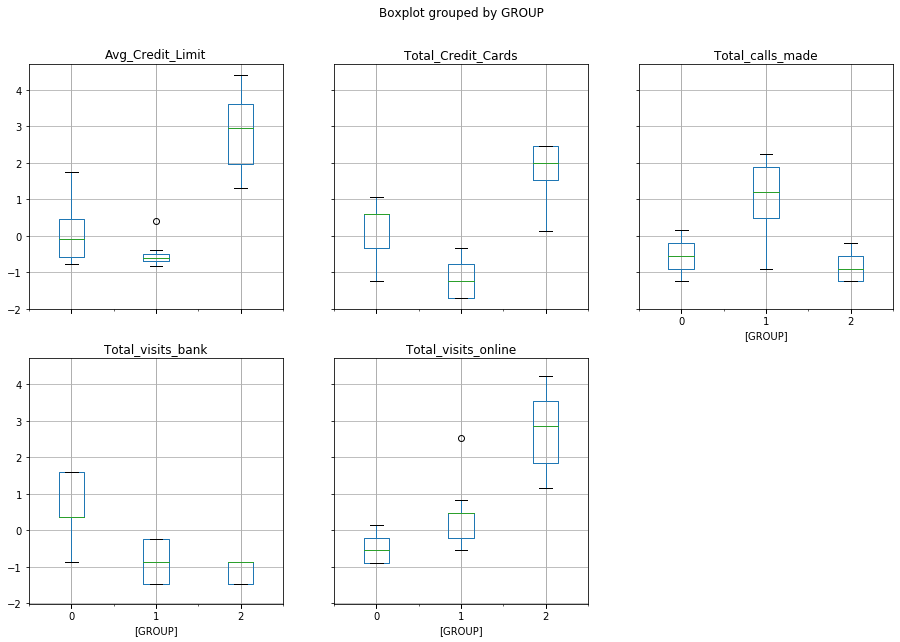

In [1065]:
ccsegScaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

# #Interpretaion of clusters from K means k=3:

#from the above boxplots, the mean dataframe after grouping, the describe data frame after grouping and also after looking at the variations between the groups in each feature, we can conclude that on average:

#group 0 is the group of customers that has low Average Credit limit and low number of credit cards. The preferd method of bank contact is the telephon calls
#group 1 customers have Average credit limit that is more than two times higher compared to group 0, they also own double the number of credit cards owned by group 0. They prefer to visit the bank themselves
#group 2 customers have the highest Average credit limit, almost 4 times higher than group 1, also the number of credit cards is two times higher than group 1. They prefer to use online banking.Which I guess is much easier and time saving method given the number of credit cards they usually have.

# # Hierarchical clustering

# # average linkage model and its Cophentic and silhouette scores

In [1066]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [1067]:
Z_avg = linkage(ccsegScaled, metric='euclidean', method='average')#traditinally euclidean is used
c, coph_dists = cophenet(Z_avg , pdist(ccsegScaled))
c

0.9168725782090766

In [1068]:
from scipy.cluster.hierarchy import fcluster
max_d= 5.5
clusters_avg = fcluster(Z_avg,max_d, criterion='distance')
clusters_avg

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [1069]:
si_avg=silhouette_score(ccsegScaled,clusters_avg)
print('si_avg',si_avg)

si_avg 0.5793418065366525


# #Cophentic and silhouette scores of a list of linkage methods and only eucliean distance

In [1070]:
Linkage_methods=['average','complete','ward','single','centroid','median']
cophentic=[]
Silhouette_score_Hierarchy=[]
Metric='euclidean'
max_d_list= []
for m in methods:
    Z_m = linkage(ccsegScaled, metric=Metric, method=m)
    c, coph_dists = cophenet(Z_m , pdist(ccsegScaled))
    clusters_m = fcluster(Z_m,max_d, criterion='distance')
    #silhouette_score(ccsegScaled,clusters_m)
    cophentic.append(c)
    #Silhouette_score_Hierarchy.append(silhouette_score)
print('Linkage methods =' ,methods)  
print('cophentic',cophentic)
#print(Silhouette_score_Hierarchy)

Linkage methods = ['average', 'complete', 'ward', 'single', 'centroid', 'median']
cophentic [0.9168725782090766, 0.8860521900934342, 0.774233615737438, 0.8788676940541079, 0.9134704636213649, 0.8870097301491704]


#assigning max_d as above for all methods does not work, every method has its own max depth
#

In [1071]:
performance

,number of clusters k,Silhouette_score_k means
0,2,0.418425
1,3,0.515718
2,4,0.355667
3,5,0.271747
4,6,0.255837
5,16,0.222174


In [1072]:
performance['Linkage methods of Hierarchical clustering']=Linkage_methods
performance['cophentic']=cophentic

In [1073]:
performance

,number of clusters k,Silhouette_score_k means,Linkage methods of Hierarchical clustering,cophentic
0,2,0.418425,average,0.916873
1,3,0.515718,complete,0.886052
2,4,0.355667,ward,0.774234
3,5,0.271747,single,0.878868
4,6,0.255837,centroid,0.913470
5,16,0.222174,median,0.887010


In [1074]:
max_d_list.append(max_d)
Silhouette_score_Hierarchy.append(si_avg)

In [1075]:
max_d= 5.5
z_com= linkage(ccsegScaled, metric='euclidean', method='complete')
clusters_com = fcluster(z_com,max_d, criterion='distance')
#clusters_com

In [1076]:
si_com=silhouette_score(ccsegScaled,clusters_com)
print('si_com',si_com)

si_com 0.5401321667095028


In [1077]:
max_d_list.append(max_d)
Silhouette_score_Hierarchy.append(si_com)

In [1078]:
max_d= 5.5
z_w= linkage(ccsegScaled, metric='euclidean', method='ward')
clusters_w = fcluster(z_w,max_d, criterion='distance')
si_w=silhouette_score(ccsegScaled,clusters_w)
print('si_w',si_w)

si_w 0.18119134173437396


In [1079]:
max_d_list.append(max_d)
Silhouette_score_Hierarchy.append(si_w)

In [1080]:
max_d= 2
z_s= linkage(ccsegScaled, metric='euclidean', method='single')
clusters_s = fcluster(z_s,max_d, criterion='distance')
si_s=silhouette_score(ccsegScaled,clusters_s)
print('si_s',si_s)

si_s 0.5793418065366525


In [1081]:
max_d_list.append(max_d)
Silhouette_score_Hierarchy.append(si_s)

In [1082]:
max_d= 2
z_cent= linkage(ccsegScaled, metric='euclidean', method='centroid')
clusters_cent = fcluster(z_cent,max_d, criterion='distance')
si_cent=silhouette_score(ccsegScaled,clusters_cent)
print('si_cent',si_cent)

si_cent 0.35701245413693855


In [1083]:
max_d_list.append(max_d)
Silhouette_score_Hierarchy.append(si_cent)

In [1084]:
max_d= 2
z_med= linkage(ccsegScaled, metric='euclidean', method='median')
clusters_med = fcluster(z_med,max_d, criterion='distance')
si_med=silhouette_score(ccsegScaled,clusters_med)
print('si_med',si_med)

si_med 0.3576576787323818


In [1085]:
max_d_list.append(max_d)
Silhouette_score_Hierarchy.append(si_med)

In [1086]:
print(max_d_list)
print(Silhouette_score_Hierarchy)

[5.5, 5.5, 5.5, 2, 2, 2]
[0.5793418065366525, 0.5401321667095028, 0.18119134173437396, 0.5793418065366525, 0.35701245413693855, 0.3576576787323818]


In [1087]:
performance['max_depth for the linkage method']=max_d_list
performance['Silhouette_score_Hierarchy']=Silhouette_score_Hierarchy

# #Performance of all clutering methods used above

In [1088]:
performance

,number of clusters k,Silhouette_score_k means,Linkage methods of Hierarchical clustering,cophentic,max_depth for the linkage method,Silhouette_score_Hierarchy
0,2,0.418425,average,0.916873,5.5,0.579342
1,3,0.515718,complete,0.886052,5.5,0.540132
2,4,0.355667,ward,0.774234,5.5,0.181191
3,5,0.271747,single,0.878868,2.0,0.579342
4,6,0.255837,centroid,0.913470,2.0,0.357012
5,16,0.222174,median,0.887010,2.0,0.357658


##Notes:
#1) the max depth inside the fcluster function  does have an effect on the results
#2)For example the max depth = 5.5 worked well with average, complete and ward but gave an error with single centroid and median
#3)The above performance datafame shows that the best cophentic is for the linkage method average 
#then the linakge method centroid
#4) The linkage method average also shows the best Silhouette score 0.579342 in addition to the 0.916873 cophentic score
#5) we will plot the dendograms of both the average and the centroid methods
#6) For the final model we will choose the average methods

# #linkage average dendogram

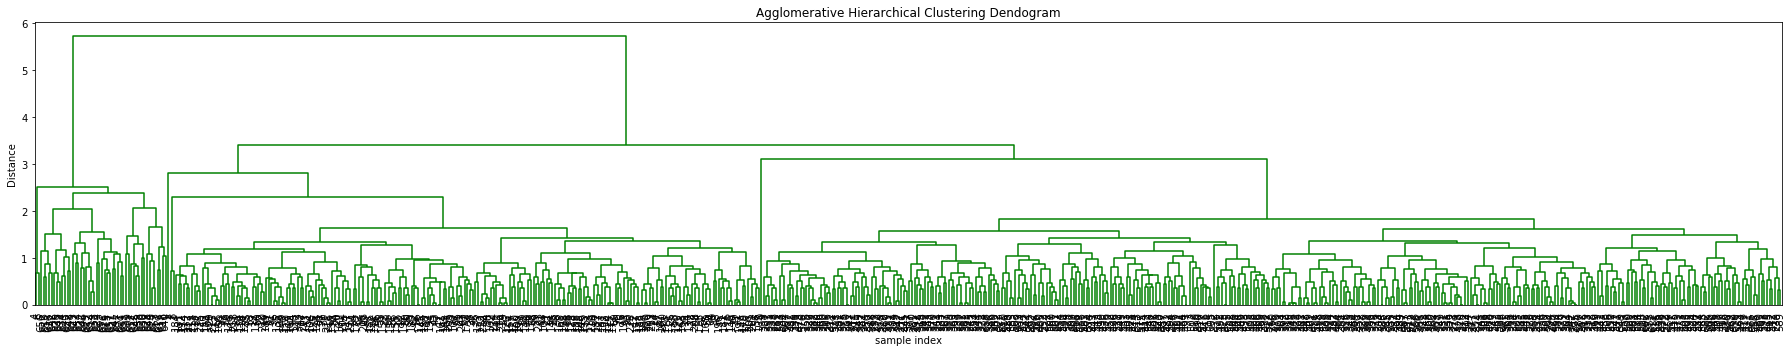

In [1089]:
plt.figure(figsize=(25, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_avg, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

# linkage centriod dendogram

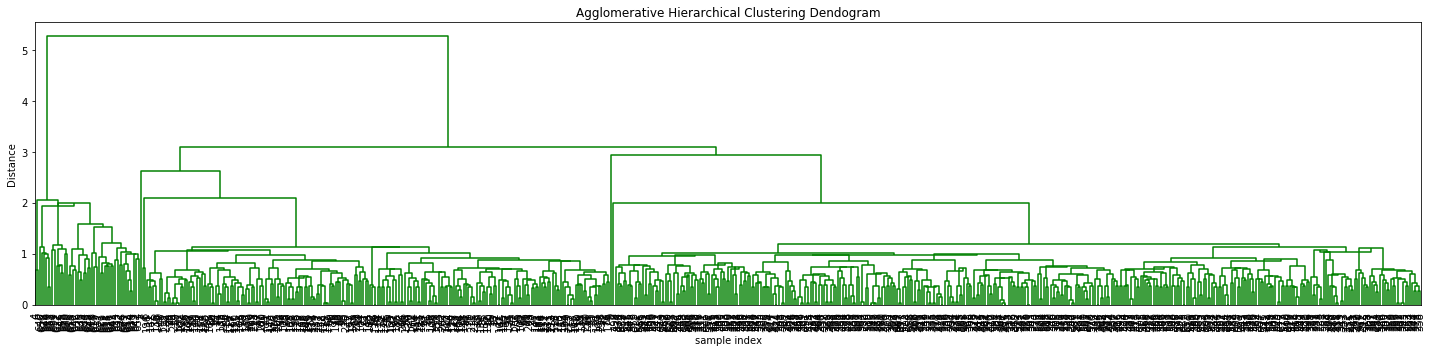

In [1090]:
plt.figure(figsize=(20, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z_cent, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

# Final model: Dendogram: average

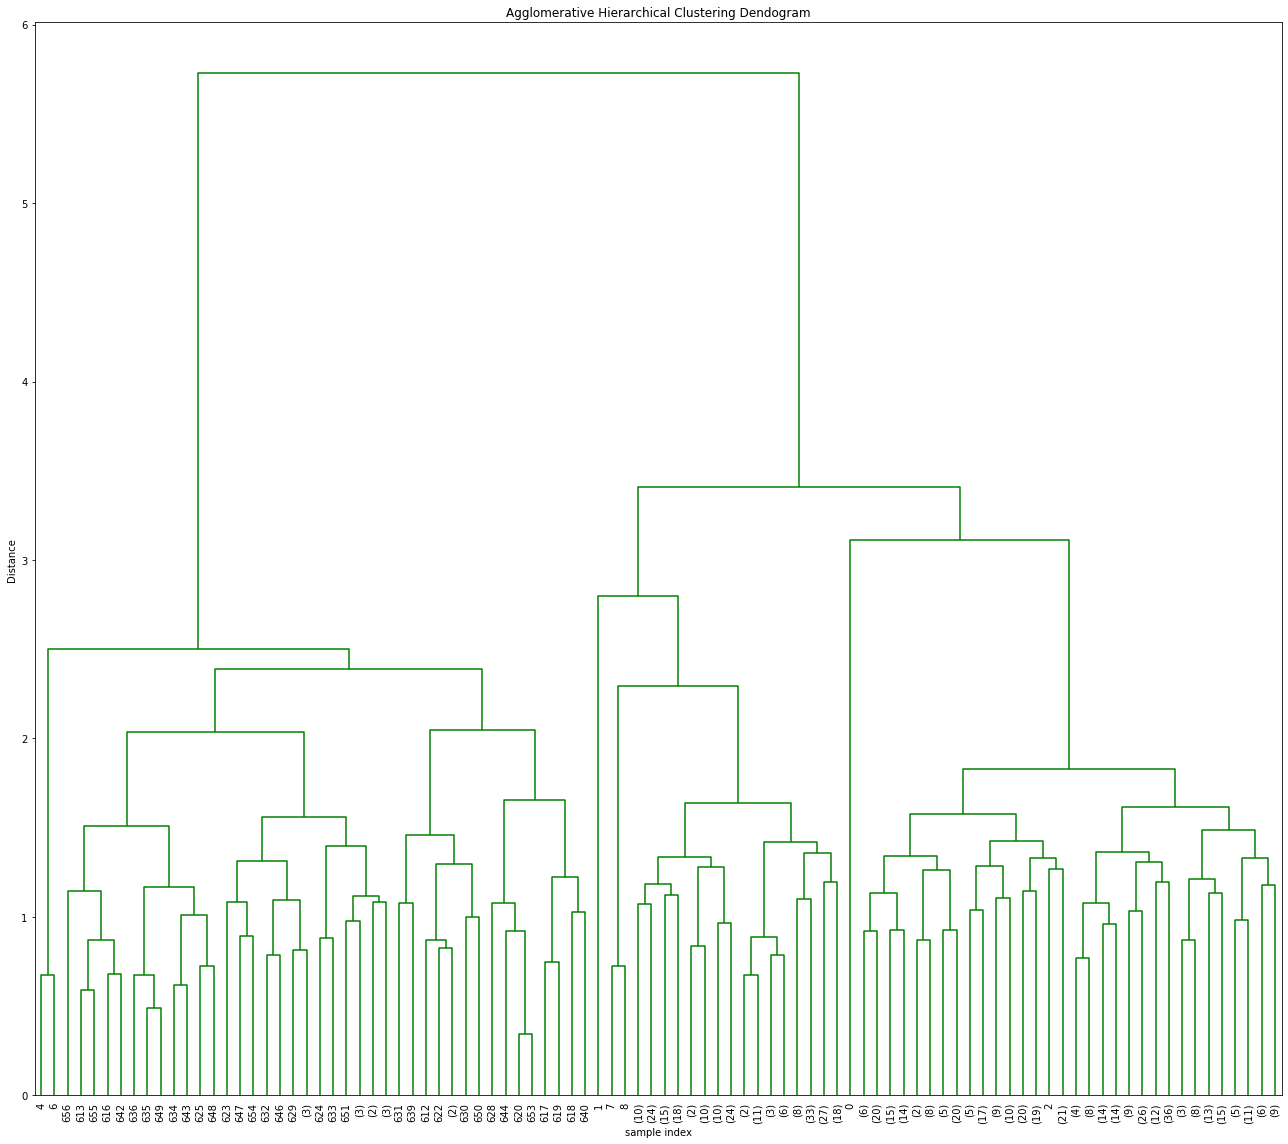

In [1091]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(ccsegScaled, 'average')
dendrogram(Z,leaf_rotation=90.0,p=7,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [1092]:
#remember:
ccsegScaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [1093]:
#to assign the new clsters from the hirerical we have to drop the clusters= GROUP that have been generated from Kmeans previously
#Then we give it a new name: ccsegScaled_Hir
ccsegScaled_Hir=ccsegScaled.drop(['GROUP'],axis=1)

In [1094]:
ccsegScaled_Hir

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


# Get the new clusters using the final model
#lets choose the distance 3.3 in the dendogram: which will give k=3:
#With the help of the results listed above in the performance dataframe and from the dendogram, we create the model using k=3, euclidean distance and average linkage

In [1095]:
from sklearn.cluster import AgglomerativeClustering 
model_Hir = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_Hir.fit(ccsegScaled_Hir)
#append the new lables to the scaled dtafram
ccsegScaled_Hir['labels'] = model_Hir.labels_

In [1096]:
ccsegScaled_Hir

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,1
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,1
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,1
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,1


In [1097]:
#Also drop GROUP generated by kmeans from the original unscaled dataframe and call it ccseg_Hir
ccseg_Hir=ccseg.drop(['GROUP'],axis=1)

In [1098]:
ccseg_Hir

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [1099]:
#Now append the new groups or clusters or lables generated by the Hir model to the ccseg_Hir datafrmae
ccseg_Hir['labels'] = model_Hir.labels_

In [1100]:
ccseg_Hir

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


# Boxplots for k=3 model and the statistical moments of the groups interpretation: Hierarchial

# The mean of clusters

In [1101]:
ccsegClust_Hir = ccseg_Hir.groupby(['labels'],as_index=False)
ccsegClust_Hir.mean()

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [1102]:
#Remember : here is again: the mean of each feature in each group k means results
ccsegClust.mean()

,GROUP,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,2,141040.000000,8.740000,0.600000,10.900000,1.080000


#the two above data frame shows that the results are pretty close

## # Boxplots for k=3  model Hierarchical

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F3BB17B88>,
      dtype=object)

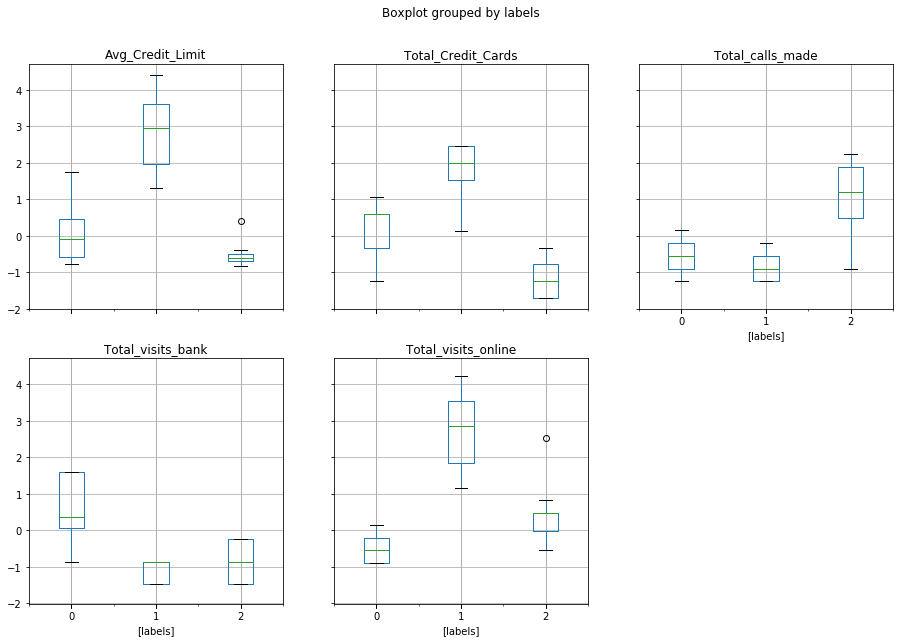

In [1103]:
ccsegScaled_Hir.boxplot(by='labels', layout = (2,3),figsize=(15,10))

#The contact method prefernces here is a bit different from the results of the kmeans above:

#group 0 is the group of customers that has low Average Credit limit and low number of credit cards. The preferd method of bank contact is the physical vists to the bank then comes the calls and lastly the online.

#group 1 customers have the highest Average credit limit, almost 11 times higher than group 0, and 4 times higher than group 2, also the number of credit cards is two times higher than group 2 and 4 times higher than group 0. They prefer to use online banking. They rarely use phone calls and visits to the bank

#group 2 customers have Average credit limit that is more than two times higher compared to group 0, they also own double the number of credit cards owned by group 0. They prefer to call the bank they use the online banking sometimes and the least preferd method is the bank visits for them

# The statistical moments of clusters

In [1104]:
ccsegClust_Hir.describe().T

0              1             2
Avg_Credit_Limit    count     387.000000      50.000000    223.000000
                    mean    33713.178295  141040.000000  12197.309417
                    std     22182.542428   34457.877272   5249.332169
                    min      5000.000000   84000.000000   3000.000000
                    25%     13000.000000  108750.000000   8000.000000
                    50%     31000.000000  145500.000000  12000.000000
                    75%     52000.000000  170000.000000  16000.000000
                    max    100000.000000  200000.000000  50000.000000
Total_Credit_Cards  count     387.000000      50.000000    223.000000
                    mean        5.511628       8.740000      2.403587
                    std         1.141195       1.274715      1.098068
                    min         2.000000       5.000000      1.000000
                    25%         4.000000       8.000000      1.000000
                    50%         6.000000       9.000000      2.000000
                    75%         6.000000      10.000000      3.000000
                    max         7.000000      10.000000      4.000000
Total_visits_bank   count     387.000000      50.000000    223.000000
                    mean        3.485788       0.600000      0.928251
                    std         1.136616       0.494872      0.802171
                    min         1.000000       0.000000      0.000000
                    25%         2.500000       0.000000      0.000000
                    50%         3.000000       1.000000      1.000000
                    75%         5.000000       1.000000      2.000000
                    max         5.000000       1.000000      2.000000
Total_visits_online count     387.000000      50.000000    223.000000
                    mean        0.984496      10.900000      3.560538
                    std         0.857619       2.880264      1.217242
                    min         0.000000       6.000000      1.000000
                    25%         0.000000       8.000000      2.500000
                    50%         1.000000      11.000000      4.000000
                    75%         2.000000      13.000000      4.000000
                    max         3.000000      15.000000     10.000000
Total_calls_made    count     387.000000      50.000000    223.000000
                    mean        2.005168       1.080000      6.883408
                    std         1.432406       0.876915      1.985271
                    min         0.000000       0.000000      1.000000
                    25%         1.000000       0.000000      5.000000
                    50%         2.000000       1.000000      7.000000
                    75%         3.000000       2.000000      9.000000
                    max         4.000000       3.000000     10.000000
labels              count     387.000000      50.000000    223.000000
                    mean        0.000000       1.000000      2.000000
                    std         0.000000       0.000000      0.000000
                    min         0.000000       1.000000      2.000000
                    25%         0.000000       1.000000      2.000000
                    50%         0.000000       1.000000      2.000000
                    75%         0.000000       1.000000      2.000000
                    max         0.000000       1.000000      2.000000

#From the above two data frames and box plots we can see very clear distiction in all statistical moments between the 3 groups

In [1105]:
performance

,number of clusters k,Silhouette_score_k means,Linkage methods of Hierarchical clustering,cophentic,max_depth for the linkage method,Silhouette_score_Hierarchy
0,2,0.418425,average,0.916873,5.5,0.579342
1,3,0.515718,complete,0.886052,5.5,0.540132
2,4,0.355667,ward,0.774234,5.5,0.181191
3,5,0.271747,single,0.878868,2.0,0.579342
4,6,0.255837,centroid,0.913470,2.0,0.357012
5,16,0.222174,median,0.887010,2.0,0.357658


#compare Si between K anf Hir:
#We can see that the best model in K means is the k=3 with 0.515718 Silhouette score
#While the best model in the Hierarchical is the aveerage that gives both the highest cophetic and silhouette scores 0.916873 and 0.579342, respectively
#However we also see that the silhouette score is better for the hierarchiacl clustering 0.579342 > 0.515718

#in general comparison between k means and Hierarical results:

#if we look at the dataframes of the means of the resultant clusters for both methods:
#ccsegClust.mean() vs ccsegClust_Hir.mean(), then we see that the distinction between the groups is alomst the same 

#Also, by looking at ccsegClust.describe vs ccsegClust_Hir.describe, we see that the statistical moments of all features for all the thee groups are very close: max, min and mean

#the scame cnclusion comes by looking at the boxplots too of both methods

#how clusters are different: The detailed explination of the clusters based on the boxplots have been given above for each method alone.
#the difference I found between the clustering of the two methods is the method the customers use to contact the bank as explained above


#Recommendations:
#assuming that we followed the group results that have been suggested by Hierarchical clustering:
#group 0 has the lowest limit and lowest number of credit cards,
#then group 2 has a higher limit and cedit cards number, then group 1 has the highest limit and number of credit cards
#online banking is the preferd method for group 1
##
#try to upgarde customers from group 2 to group 1
#1)they like phone calls, so maybe a good idea is to increase the number of phone calls to them and offer them new credit cards w ith no intrest for 6 months or no fees credit cards
#2)offer them discount or credit card limit increse if they decided to change their contact method to online banking
##
#try to attract more customers in group 1 to increase the number of credit cards they own
#1)since they prefer to use online services, then maybe make the application of new credit cards accessible through the website
#2) offer them further increse in the limit
#3)offer then no fees on the 6th card they own or extra long extensions on it 
#4)Try to track their most expensive online purchases they often make and offer them discount if they applied to specific new credit card
#5) the bank has to pay  great attention to the quality, and the speed of the online banking to keep the customers in this group happy
#6)The bank has to increse the safety and security measures to make customers feel more safe with operations
##
try to upgrade customers in group 0 to group 1 or 2
#1) offer them discount code or limit increse after completeing 3 banking services online, for example
#2) since they prefer to come to the bank, arrange extensive meetings with them to show them how to use online banking or to give them good offers
#3)the bank also can show this group and demostrate to them the high security level in online banking 